In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn.functional as F

##DataSet Work

In [28]:
data = np.genfromtxt('dataset/toydata.txt', delimiter='\t')
X = data[:, :2].astype(np.float32)
y = data[:, 2].astype(np.int64)

np.random.seed(123)
idx = np.arange(y.shape[0])
np.random.shuffle(idx)

Xtrain = X[idx[25:]]
yTrain = y[idx[25:]]
Xtest = X[idx[:25]]
yTest = y[idx[:25]]

mean , std = np.mean(Xtrain, axis=0) , np.std(Xtrain,axis=0)
Xtest = (Xtest-mean)/std
Xtrain = (Xtrain-mean)/std

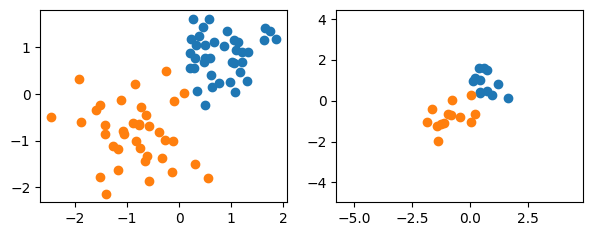

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(7, 2.5))
ax[0].scatter(Xtrain[yTrain == 1, 0], Xtrain[yTrain == 1, 1])
ax[0].scatter(Xtrain[yTrain == 0, 0], Xtrain[yTrain == 0, 1])
ax[1].scatter(Xtest[yTest == 1, 0], Xtest[yTest == 1, 1])
ax[1].scatter(Xtest[yTest == 0, 0], Xtest[yTest == 0, 1])
plt.xlim([X[:, 0].min()-0.5, X[:, 0].max()+0.5])
plt.ylim([X[:, 1].min()-0.5, X[:, 1].max()+0.5])
plt.show()

##Model Implementation

In [30]:
class LogisticReg(torch.nn.Module):

  def __init__(self,numFeatures):
    super(LogisticReg,self).__init__()
    self.linear  = torch.nn.Linear(numFeatures,1)

    self.linear.weight.detach().zero_()
    self.linear.bias.detach().zero_()

  def forward(self,X):
    logit = self.linear(X)
    probas = torch.sigmoid(logit)
    return probas


In [31]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [32]:
model = LogisticReg(numFeatures=2).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [33]:
def modelAccuracy(labels,probas):
  pred = torch.where((probas>0.5),1,0).view(-1)
  acc = torch.sum(pred == labels.view(-1)).float() / labels.size(0)
  return acc


In [34]:
totalEpoch =30

In [35]:
X_train_tensor = torch.tensor(Xtrain, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(yTrain, dtype=torch.float32, device=device).view(-1, 1)

In [36]:
for epoch in range(totalEpoch):
  out = model(X_train_tensor)

  loss = F.binary_cross_entropy(out,y_train_tensor,reduction='sum')
  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

  predProba = model(X_train_tensor)
  acc = modelAccuracy(y_train_tensor,predProba)
  print('Epoch: %03d' % (epoch + 1), end="")
  print(' | Train ACC: %.3f' % acc, end="")
  print(' | Cost: %.3f' % F.binary_cross_entropy(predProba, y_train_tensor))

print('\nModel parameters:')
print('  Weights: %s' % model.linear.weight)
print('  Bias: %s' % model.linear.bias)

Epoch: 001 | Train ACC: 0.973 | Cost: 0.055
Epoch: 002 | Train ACC: 0.973 | Cost: 0.053
Epoch: 003 | Train ACC: 0.973 | Cost: 0.051
Epoch: 004 | Train ACC: 0.973 | Cost: 0.049
Epoch: 005 | Train ACC: 0.973 | Cost: 0.048
Epoch: 006 | Train ACC: 0.973 | Cost: 0.047
Epoch: 007 | Train ACC: 0.973 | Cost: 0.046
Epoch: 008 | Train ACC: 0.973 | Cost: 0.045
Epoch: 009 | Train ACC: 0.973 | Cost: 0.044
Epoch: 010 | Train ACC: 0.987 | Cost: 0.043
Epoch: 011 | Train ACC: 0.987 | Cost: 0.042
Epoch: 012 | Train ACC: 0.987 | Cost: 0.041
Epoch: 013 | Train ACC: 0.987 | Cost: 0.041
Epoch: 014 | Train ACC: 0.987 | Cost: 0.040
Epoch: 015 | Train ACC: 0.987 | Cost: 0.039
Epoch: 016 | Train ACC: 0.987 | Cost: 0.039
Epoch: 017 | Train ACC: 1.000 | Cost: 0.038
Epoch: 018 | Train ACC: 1.000 | Cost: 0.038
Epoch: 019 | Train ACC: 1.000 | Cost: 0.037
Epoch: 020 | Train ACC: 1.000 | Cost: 0.036
Epoch: 021 | Train ACC: 1.000 | Cost: 0.036
Epoch: 022 | Train ACC: 1.000 | Cost: 0.036
Epoch: 023 | Train ACC: 1.000 | 

In [38]:
X_test_tensor = torch.tensor(Xtest, dtype=torch.float32, device=device)
y_test_tensor = torch.tensor(yTest, dtype=torch.float32, device=device)

pred_probas = model(X_test_tensor)
test_acc = modelAccuracy(y_test_tensor, pred_probas)

print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 96.00%


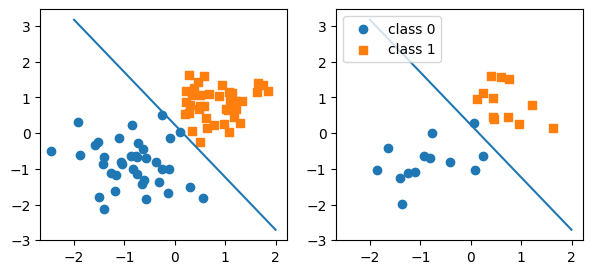

In [39]:

w, b = model.linear.weight.detach().view(-1), model.linear.bias.detach()

x_min = -2
y_min = ( (-(w[0] * x_min) - b[0])
          / w[1] )

x_max = 2
y_max = ( (-(w[0] * x_max) - b[0])
          / w[1] )


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))
ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

ax[0].scatter(Xtrain[yTrain==0, 0], Xtrain[yTrain==0, 1], label='class 0', marker='o')
ax[0].scatter(Xtrain[yTrain==1, 0], Xtrain[yTrain==1, 1], label='class 1', marker='s')

ax[1].scatter(Xtest[yTest==0, 0], Xtest[yTest==0, 1], label='class 0', marker='o')
ax[1].scatter(Xtest[yTest==1, 0], Xtest[yTest==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()